# Main data of DataSciencester

## DataSciencester Users

In [1]:
users = [{'id':0, 'name':'Julio'},
        {'id':1, 'name':'Julia'},
        {'id':2, 'name':'Marilia'},
        {'id':3, 'name':'Adelia'},
        {'id':4, 'name':'Alberto'},
        {'id':5, 'name':'Maria Luiza'},
        {'id':6, 'name':'Jeronimo'},
        {'id':7, 'name':'Elaine'},
        {'id':8, 'name':'Elisangela'},
        {'id':9, 'name':'Eliana'}]

## Users Friendship Relationships

In [2]:
friendships =[(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

## Setting friends as an attribute of users

In [3]:
for user in users:
    user['friends'] = []

for i, j in friendships:
    users[i]['friends'].append(users[j])
    users[j]['friends'].append(users[i])

# Looking into the the total of connections

In [4]:
def number_of_friends(user):
    return len(user['friends'])

total_connections = sum(number_of_friends(user) for user in users)
print(total_connections)

24


# Avarage of connections by user

In [5]:
num_users = len(users)
print(num_users)
avg_connections = total_connections / num_users
print(avg_connections)

10
2.4


# Other DataScientists You May Know

## Mutual Friends

In [6]:
num_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]

sorted(num_friends_by_id, 
       key=lambda pair: pair[1], 
       reverse=True)

def friends_of_friends_ids_bad(user):
    return [foaf['id']
           for friend in user['friends']
           for foaf in friend['friends']]

for user in users:
    print(user['name'], ' is friend of:')
    print([friend['name'] for friend in user['friends']])

Julio  is friend of:
['Julia', 'Marilia']
Julia  is friend of:
['Julio', 'Marilia', 'Adelia']
Marilia  is friend of:
['Julio', 'Julia', 'Adelia']
Adelia  is friend of:
['Julia', 'Marilia', 'Alberto']
Alberto  is friend of:
['Adelia', 'Maria Luiza']
Maria Luiza  is friend of:
['Alberto', 'Jeronimo', 'Elaine']
Jeronimo  is friend of:
['Maria Luiza', 'Elisangela']
Elaine  is friend of:
['Maria Luiza', 'Elisangela']
Elisangela  is friend of:
['Jeronimo', 'Elaine', 'Eliana']
Eliana  is friend of:
['Elisangela']


In [7]:
for user in users:
    fofids = friends_of_friends_ids_bad(users[0])
    print(user['name'], ' ', fofids)

Julio   [0, 2, 3, 0, 1, 3]
Julia   [0, 2, 3, 0, 1, 3]
Marilia   [0, 2, 3, 0, 1, 3]
Adelia   [0, 2, 3, 0, 1, 3]
Alberto   [0, 2, 3, 0, 1, 3]
Maria Luiza   [0, 2, 3, 0, 1, 3]
Jeronimo   [0, 2, 3, 0, 1, 3]
Elaine   [0, 2, 3, 0, 1, 3]
Elisangela   [0, 2, 3, 0, 1, 3]
Eliana   [0, 2, 3, 0, 1, 3]



#### A better way

In [8]:
def not_the_same(user1, user2):
    return user1['id'] != user2['id']

def not_friends(user1, user2):
    return all(not_the_same(friend, user2) for friend in user['friends'])

In [9]:
from collections import Counter

def friends_of_friends_ids(user):
    return Counter(foaf['id']
                  for friend in user['friends']
                  for foaf in friend['friends']
                  if not_the_same(user, foaf) 
                  and not_friends(user, foaf))

for user in users:
    print(user['name']," ",friends_of_friends_ids(user))

Julio   Counter({3: 2})
Julia   Counter({4: 1})
Marilia   Counter({4: 1})
Adelia   Counter({0: 2, 5: 1})
Alberto   Counter({1: 1, 2: 1, 6: 1, 7: 1})
Maria Luiza   Counter({8: 2, 3: 1})
Jeronimo   Counter({7: 2, 4: 1, 9: 1})
Elaine   Counter({6: 2, 4: 1, 9: 1})
Elisangela   Counter({5: 2})
Eliana   Counter({6: 1, 7: 1})


In [10]:
for user in users:
    counter = friends_of_friends_ids(user)
    print(user['name']," may also know: ")
    for possibleFriend in users:
        hits = counter[possibleFriend['id']]
        if (hits == 0): 
            continue
        print("-> ", possibleFriend['name'],". Because ", hits, " mutual friends.")
    print('-----------------------')
    

Julio  may also know: 
->  Adelia . Because  2  mutual friends.
-----------------------
Julia  may also know: 
->  Alberto . Because  1  mutual friends.
-----------------------
Marilia  may also know: 
->  Alberto . Because  1  mutual friends.
-----------------------
Adelia  may also know: 
->  Julio . Because  2  mutual friends.
->  Maria Luiza . Because  1  mutual friends.
-----------------------
Alberto  may also know: 
->  Julia . Because  1  mutual friends.
->  Marilia . Because  1  mutual friends.
->  Jeronimo . Because  1  mutual friends.
->  Elaine . Because  1  mutual friends.
-----------------------
Maria Luiza  may also know: 
->  Adelia . Because  1  mutual friends.
->  Elisangela . Because  2  mutual friends.
-----------------------
Jeronimo  may also know: 
->  Alberto . Because  1  mutual friends.
->  Elaine . Because  2  mutual friends.
->  Eliana . Because  1  mutual friends.
-----------------------
Elaine  may also know: 
->  Alberto . Because  1  mutual friends.
->  

## Mutual Interests

In [11]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

#### function fo find users with mutual interests

In [12]:
def data_scientistis_who_like(target_interest):
    return[user_id
          for user_id, user_interest in interests
          if user_interest == target_interest]

#### index of interests by user

In [13]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

#### index of users by interests

In [14]:
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

#### most mutual interests

In [15]:
def most_common_interests_with(user):
    return Counter(interest_user_id
                  for interest in interests_by_user_id[user['id']]
                  for interest_user_id in user_ids_by_interest[interest]
                  if interest_user_id != user['id'])

def get_mutal_interests(user1, user2):
    mutal_interests = [];
    for interest1 in interests_by_user_id[user1['id']]:
        for interest2 in interests_by_user_id[user2['id']]:
                  if interest1 == interest2: 
                    mutal_interests.append(interest1)
    return mutal_interests

In [16]:
for user in users:
    counter = most_common_interests_with(user)
    print(user['name']," may want to know: ")
    for possibleFriend in users:
        hits = counter[possibleFriend['id']]
        if (hits == 0): 
            continue
        print("-> ", possibleFriend['name'],". Because ", hits, " mutual interest(s): ", get_mutal_interests(user, possibleFriend))
    print('-----------------------')

Julio  may want to know: 
->  Julia . Because  2  mutual interest(s):  ['HBase', 'Cassandra']
->  Maria Luiza . Because  1  mutual interest(s):  ['Java']
->  Elisangela . Because  1  mutual interest(s):  ['Big Data']
->  Eliana . Because  3  mutual interest(s):  ['Hadoop', 'Big Data', 'Java']
-----------------------
Julia  may want to know: 
->  Julio . Because  2  mutual interest(s):  ['Cassandra', 'HBase']
-----------------------
Marilia  may want to know: 
->  Adelia . Because  1  mutual interest(s):  ['Python']
->  Maria Luiza . Because  1  mutual interest(s):  ['Python']
->  Elaine . Because  1  mutual interest(s):  ['scikit-learn']
-----------------------
Adelia  may want to know: 
->  Marilia . Because  1  mutual interest(s):  ['Python']
->  Alberto . Because  1  mutual interest(s):  ['regression']
->  Maria Luiza . Because  2  mutual interest(s):  ['R', 'Python']
->  Jeronimo . Because  2  mutual interest(s):  ['statistics', 'probability']
-----------------------
Alberto  may w

# Salary X Experience

In [17]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

## Chart

In [18]:
from matplotlib import pyplot as plt

def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

In [19]:
def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

# keys are years
# values are the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

## Paid Accounts

In [20]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0: return "paid"
  elif years_experience < 8.5: return "unpaid"
  else: return "paid"

## Statistics

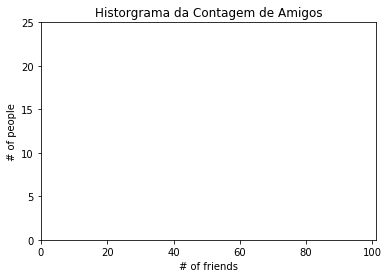

In [27]:
friend_counts = Counter(num_friends_by_id)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("Historgrama da Contagem de Amigos")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

### Generating some statistics

In [30]:
num_points = len(num_friends_by_id)
num_points

10

In [32]:
largest = max(num_friends_by_id)
largest

(9, 1)

In [34]:
smallest = min(num_friends_by_id)
smallest

(0, 2)

In [ ]:
sorted_values = sorted(num_friends_by_id)
